# Лаба 6

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import scaleogram as scg
import scipy, scipy.fftpack, scipy.signal

In [109]:
coikw = {'alpha': 0.5, 'hatch': '/'}
plt.rcParams['figure.figsize'] = [7,5]

# Сгенерируем сигнал

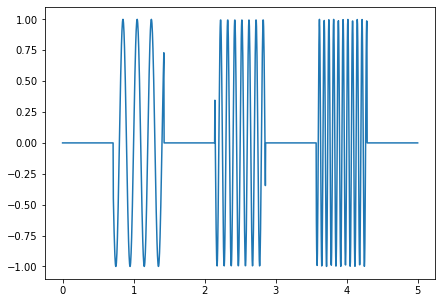

In [110]:
sample = 1400
f1, f2, f3, = 5, 10, 15
T = 5 #s

Time = np.linspace(0, T, sample)
times = np.split(Time, 7)
times[0], times[2], times[4], times[6] = np.zeros(times[0].size), np.zeros(times[0].size), np.zeros(times[0].size), np.zeros(times[0].size)

sig1 = np.sin(2 * np.pi * times[1] * f1)
sig2 = np.sin(2 * np.pi * times[3] * f2)
sig3 = np.sin(2 * np.pi * times[5] * f3)

sig = np.concatenate([times[0], sig1, times[2], sig2, times[4], sig3, times[6]])
Time = np.linspace(0, T, len(sig))
plt.plot(Time, sig)

# Первая часть лабы

<AxesSubplot:title={'center':'Continuous Wavelet Transform Amplitude Spectrum'}, xlabel='Time [seconds]', ylabel='Period [seconds]'>

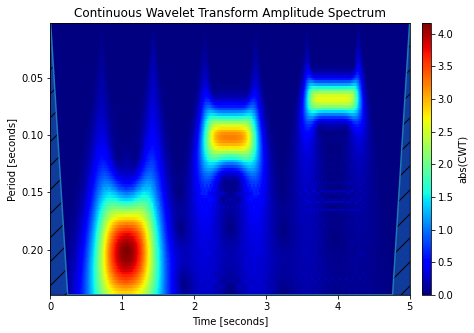

In [111]:
scg.cws(Time, sig, coikw=coikw,
        ylabel="Period [seconds]", xlabel="Time [seconds]",
        title='Continuous Wavelet Transform Amplitude Spectrum')

# Вторая часть лабы

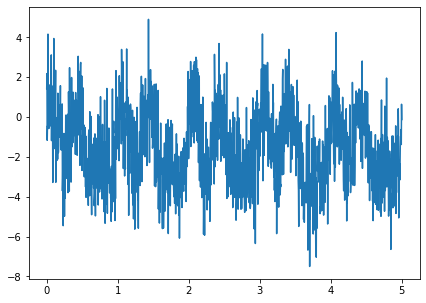

In [112]:
freqs = (1, 2, 3)
noisy_signal = np.sin(2 * np.pi * freqs[0] * Time)\
             + np.cos(2 * np.pi * freqs[1] * Time)\
             + np.sin(2 * np.pi * freqs[2] * Time)\
             + np.random.normal(-1.5, 1.5, Time.shape)
plt.plot(Time, noisy_signal)

In [145]:
### create wavelets
# parameters
freq = 2 # peak frequency
csw  = np.cos(2*np.pi*freq*Time) # cosine wave
fwhm = 1 # full-width at half-maximum in seconds
gaussian = np.exp( -(4*np.log(2)*Time**2) / fwhm**2 ) # Gaussian
## Morlet wavelet
MorletWavelet = csw * gaussian
## Haar wavelet
HaarWavelet = np.zeros(Time.size)
HaarWavelet[np.argmin(Time**2) : np.argmin( (Time-.5)**2 )] = 1
HaarWavelet[np.argmin((Time-.5)**2) : np.argmin( (Time-1-1/fs)**2 )] = -1
## Mexican hat wavelet
s = .4
MexicanWavelet = (2/(np.sqrt(3*s)*np.pi**.25)) * (1- (Time**2)/(s**2) ) * np.exp( (-Time**2)/(2*s**2) )

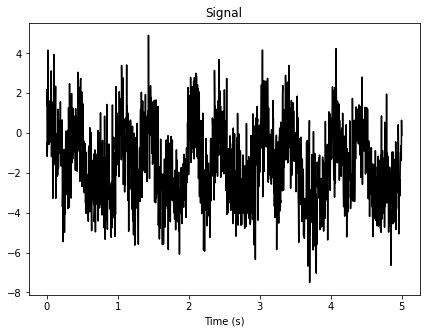

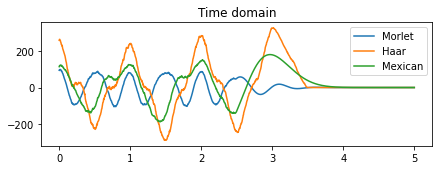

In [146]:
## convolve with random signal
# convolve signal with different wavelets
morewav = np.convolve(noisy_signal,MorletWavelet,'same')
haarwav = np.convolve(noisy_signal,HaarWavelet,'same')
mexiwav = np.convolve(noisy_signal,MexicanWavelet,'same')
### plotting
# the signal
plt.plot(Time,noisy_signal,'k')
plt.title('Signal')
plt.xlabel('Time (s)')
plt.show()
# the convolved signals
plt.subplot(211)
plt.plot(Time, morewav,label='Morlet')
plt.plot(Time, haarwav,label='Haar')
plt.plot(Time, mexiwav,label='Mexican')
plt.title('Time domain')
plt.legend()